# Linear Regression Task
## What to do
<ul>
    <li><p>Clean data</p></li>
    <li><p>Have a visualization for data</p></li>
    <li><p>Train data</p></li>
    <li><p>Evaluation</p></li>
</ul>

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Hiring.csv', skiprows=1)
df = df.fillna(0)

In [3]:
def convert_text_to_number(str_num:str):
    if isinstance(str_num, float): return str_num
    if isinstance(str_num, int): return str_num
    nums = {'zero':0, 'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'nine':9,
           'ten':10, 'eleven':11, 'twelve':12, 'thirteen':13, 'fourteen':14, 'fifteen':15, 'sixteen':16, 'seventeen':17,
           'eighteen':18, 'nineteen':19, 'twenty':20, 'thirty':30, 'fourty':40, 'fifty':50, 'sixty':60, 'seventy':70, 
           'eighty':80, 'ninety':90, 'hundred':100}
    num = 0
    for split in str_num.split():
        if split == 'and': continue
        num += nums[split]
    return num    

In [6]:
df['experience'] = df['experience'].apply(convert_text_to_number)
df['experience'] = df['experience'].astype(np.longlong)
df.rename(columns={'experience':'xp', 'test_score(out of 10)':'test_score', 
                   'interview_score(out of 10)':'interview_score', 'salary($)':'salary'}, inplace=True)
df

,xp,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,0.0,7,72000
7,11,7.0,8,80000


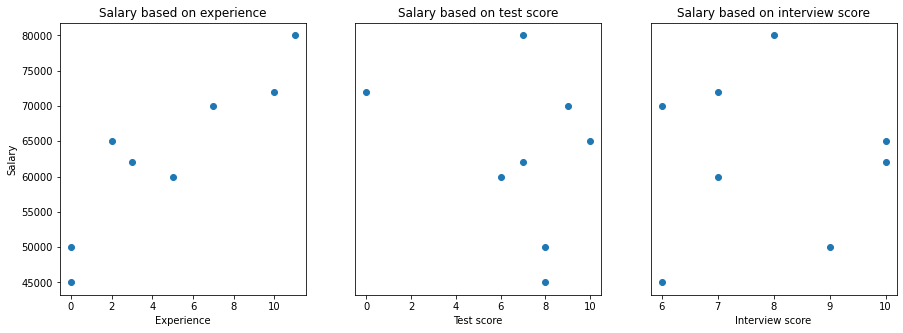

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(df['xp'], df['salary'])
ax[0].set_title('Salary based on experience')
ax[0].set_xlabel('Experience')
ax[0].set_ylabel('Salary')

ax[1].scatter(df['test_score'], df['salary'])
ax[1].set_title('Salary based on test score')
ax[1].set_xlabel('Test score')
ax[1].tick_params(left=False, labelleft=False)

ax[2].scatter(df['interview_score'], df['salary'])
ax[2].set_title('Salary based on interview score')
ax[2].set_xlabel('Interview score')
ax[2].tick_params(left=False, labelleft=False)

In [40]:
X = np.c_[(df['xp'], df['test_score'], df['interview_score'])]
y = np.array(df.salary)
reg = LinearRegression()
reg = reg.fit(X, y)

In [41]:
reg.score(X, y)

0.9718156538228174

In [53]:
test_case1 = np.array([2, 9, 6])
test_case2 = np.array([12, 10, 10])
res = np.array(reg.predict([[2, 9, 6], [12, 10, 10]]), dtype='int64')
print(f"""{test_case1[0]} years experience - {test_case1[1]} test score - {test_case1[2]} interview score 
      {res[0]} salary""")
print(f"""{test_case2[0]} years experience - {test_case2[1]} test score - {test_case2[2]} interview score 
      {res[1]} salary""")

2 years experience - 9 test score - 6 interview score 
      52688 salary
12 years experience - 10 test score - 10 interview score 
      92940 salary
